In [178]:
import pandas as pd

# Ejercicio No 1

In [179]:
# cargando el fichero
dataFrame = pd.read_csv(r'/Volumes/T7/Back-up/ds/ds_projects/project_02/autos.csv', ';')
dataFrame.head()

/var/folders/qb/lhn0zb0n5852by01ll_z9zdm0000gn/T/ipykernel_5583/4084623605.py:2: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  dataFrame = pd.read_csv(r'/Volumes/T7/Back-up/ds/ds_projects/project_02/autos.csv', ';')


,Millas_Por_Galon,Cilindros,Pais_Origen,Peso_En_Libras,Desplazamiento,Aceleracion,Nombre,Anyo,Caballo_De_Fuerza
0,18.0,8,USA,3504,307.0,12.0,chevrolet chevelle malibu,1/01/1970,130.0
1,15.0,8,USA,3693,350.0,11.5,buick skylark 320,1/01/1970,165.0
2,18.0,8,USA,3436,318.0,11.0,plymouth satellite,1/01/1970,150.0
3,16.0,8,USA,3433,304.0,12.0,amc rebel sst,1/01/1970,150.0
4,17.0,8,USA,3449,302.0,10.5,ford torino,1/01/1970,140.0


In [180]:
# convirtiendo valores a numero
def country_to_num(country_name):
    if(country_name == 'USA'):
        return 1
    if(country_name == 'Europe'):
        return 2
    if(country_name == 'Japan'):
        return 3
    return country_name

# reemplazamos la columna por una con los nuevos valores   
dataFrame['Pais_Origen'] = dataFrame['Pais_Origen'].apply(country_to_num)
dataFrame

,Millas_Por_Galon,Cilindros,Pais_Origen,Peso_En_Libras,Desplazamiento,Aceleracion,Nombre,Anyo,Caballo_De_Fuerza
0,18.0,8,1,3504,307.0,12.0,chevrolet chevelle malibu,1/01/1970,130.0
1,15.0,8,1,3693,350.0,11.5,buick skylark 320,1/01/1970,165.0
2,18.0,8,1,3436,318.0,11.0,plymouth satellite,1/01/1970,150.0
3,16.0,8,1,3433,304.0,12.0,amc rebel sst,1/01/1970,150.0
4,17.0,8,1,3449,302.0,10.5,ford torino,1/01/1970,140.0
...,...,...,...,...,...,...,...,...,...
401,27.0,4,1,2790,140.0,15.6,ford mustang gl,1/01/1982,86.0
402,44.0,4,2,2130,97.0,24.6,vw pickup,1/01/1982,52.0
403,32.0,4,1,2295,135.0,11.6,dodge rampage,1/01/1982,84.0
404,28.0,4,1,2625,120.0,18.6,ford ranger,1/01/1982,79.0


# Ejercicio No 2

In [181]:
# importando las funciones a usar
import numpy as np
from numpy import exp, log, log10, sqrt

# verificando si tenemos datos perdidos
dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406 entries, 0 to 405
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Millas_Por_Galon   398 non-null    float64
 1   Cilindros          406 non-null    int64  
 2   Pais_Origen        406 non-null    int64  
 3   Peso_En_Libras     406 non-null    int64  
 4   Desplazamiento     406 non-null    float64
 5   Aceleracion        406 non-null    float64
 6   Nombre             406 non-null    object 
 7   Anyo               406 non-null    object 
 8   Caballo_De_Fuerza  400 non-null    float64
dtypes: float64(4), int64(3), object(2)
memory usage: 28.7+ KB


In [182]:
# elimando filas con valores perdidos, fueron 14 filas lo cual no siento que afecte
# decidi optar por eliminarlas en para tener la mayor cantidad de valores reales.
dataFrame = dataFrame.dropna()
dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 405
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Millas_Por_Galon   392 non-null    float64
 1   Cilindros          392 non-null    int64  
 2   Pais_Origen        392 non-null    int64  
 3   Peso_En_Libras     392 non-null    int64  
 4   Desplazamiento     392 non-null    float64
 5   Aceleracion        392 non-null    float64
 6   Nombre             392 non-null    object 
 7   Anyo               392 non-null    object 
 8   Caballo_De_Fuerza  392 non-null    float64
dtypes: float64(4), int64(3), object(2)
memory usage: 30.6+ KB


In [183]:
# extrayendo las variables
var1 = dataFrame['Caballo_De_Fuerza']
var2 = dataFrame['Desplazamiento']

In [184]:
# agregando las variable numericas solicitadas
dataFrame = dataFrame.assign(col_1=log10(var1/var2))
dataFrame = dataFrame.assign(col_2=sqrt(var1)*(exp(var2)/200))
dataFrame = dataFrame.assign(col_3=np.where(var1 > var2, 3, 5))
dataFrame = dataFrame.assign(col_4=1/log(var1/var2)*100)
dataFrame = dataFrame.assign(col_5=var2**2/var1)
dataFrame.head()

,Millas_Por_Galon,Cilindros,Pais_Origen,Peso_En_Libras,Desplazamiento,Aceleracion,Nombre,Anyo,Caballo_De_Fuerza,col_1,col_2,col_3,col_4,col_5
0,18.0,8,1,3504,307.0,12.0,chevrolet chevelle malibu,1/01/1970,130.0,-0.373195,1.214360e+132,5,-116.371992,724.992308
1,15.0,8,1,3693,350.0,11.5,buick skylark 320,1/01/1970,165.0,-0.326584,6.468158e+150,5,-132.980902,742.424242
2,18.0,8,1,3436,318.0,11.0,plymouth satellite,1/01/1970,150.0,-0.326336,7.810177e+136,5,-133.082059,674.160000
3,16.0,8,1,3433,304.0,12.0,amc rebel sst,1/01/1970,150.0,-0.306782,6.494387e+130,5,-141.564376,616.106667
4,17.0,8,1,3449,302.0,10.5,ford torino,1/01/1970,140.0,-0.333879,8.491170e+129,5,-130.075447,651.457143


# Ejercicio No 3

In [185]:
# obtenemos la media y la deviacion estandar
median = dataFrame['Aceleracion'].mean()
standard_deviation = dataFrame['Aceleracion'].std()

# generando variables cualitativos
def aceleration_groups(aceleration):
    if(aceleration > median + 1 * standard_deviation):
        return 'Alto'    
    elif(aceleration > median - 1 * standard_deviation and aceleration < median + 1 * standard_deviation):
        return 'Medio'    
    else:
        return 'Bajo'

# agregamos la columna con los nuevos valores
dataFrame['Aceleracion_groups'] = dataFrame['Aceleracion'].apply(aceleration_groups)
dataFrame.head()

,Millas_Por_Galon,Cilindros,Pais_Origen,Peso_En_Libras,Desplazamiento,Aceleracion,Nombre,Anyo,Caballo_De_Fuerza,col_1,col_2,col_3,col_4,col_5,Aceleracion_groups
0,18.0,8,1,3504,307.0,12.0,chevrolet chevelle malibu,1/01/1970,130.0,-0.373195,1.214360e+132,5,-116.371992,724.992308,Bajo
1,15.0,8,1,3693,350.0,11.5,buick skylark 320,1/01/1970,165.0,-0.326584,6.468158e+150,5,-132.980902,742.424242,Bajo
2,18.0,8,1,3436,318.0,11.0,plymouth satellite,1/01/1970,150.0,-0.326336,7.810177e+136,5,-133.082059,674.160000,Bajo
3,16.0,8,1,3433,304.0,12.0,amc rebel sst,1/01/1970,150.0,-0.306782,6.494387e+130,5,-141.564376,616.106667,Bajo
4,17.0,8,1,3449,302.0,10.5,ford torino,1/01/1970,140.0,-0.333879,8.491170e+129,5,-130.075447,651.457143,Bajo


# Ejercicio No 4

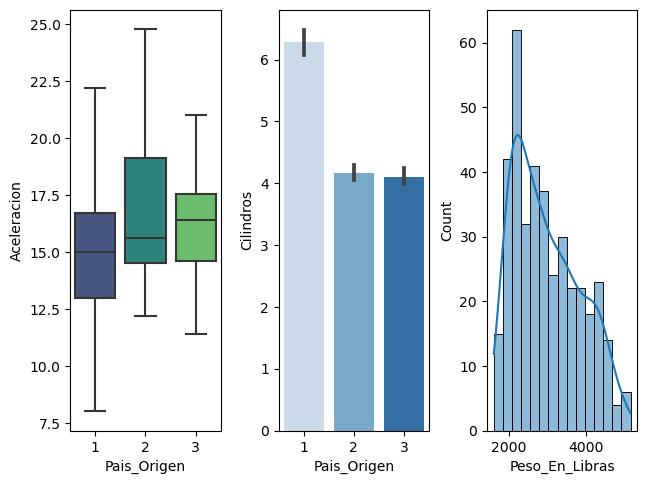

In [186]:
import matplotlib.pyplot as plt
import seaborn as sns

# declarando la funcion
def show_plots():
    # creando el plot de 3 columnas
    fig, axes = plt.subplots(nrows=1, ncols=3)
    fig.tight_layout()

    # creando el boxplot
    sns.boxplot(x='Pais_Origen', y='Aceleracion', data=dataFrame, palette='viridis', ax=axes[0])
    # creando el barplot
    sns.barplot(x='Pais_Origen', y='Cilindros', data=dataFrame, palette='Blues', ax=axes[1])
    # creando el histogram
    sns.histplot(dataFrame['Peso_En_Libras'], kde=True, bins=15)
    # mostrando plots
    plt.show()

show_plots()

# Ejercicio No 5

/var/folders/qb/lhn0zb0n5852by01ll_z9zdm0000gn/T/ipykernel_5583/3104314642.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dataFrame.corr(),annot=True, cmap='Blues')


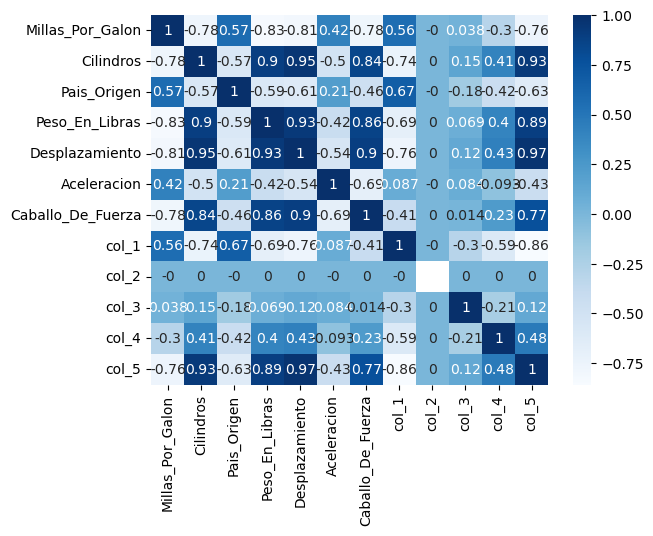

In [187]:
def show_heatmap(): 
    sns.heatmap(dataFrame.corr(),annot=True, cmap='Blues')
    plt.show()


show_heatmap()